In [1]:
from neural_priors.utils.data import Subject
import seaborn as sns
import pandas as pd

In [2]:
subjects = ['alina', 'gy', 'saurabh', 'gilles3', 'ella', 'maike']

df = []
for subject in subjects:
    sub = Subject(subject)
    df.append(sub.get_behavioral_data(add_info=True))

df = pd.concat(df)

Problem with feedback run 5: [Errno 2] No such file or directory: '/data/ds-neuralpriors/sourcedata/behavior/sub-gy/ses-1/sub-gy_ses-1_task-feedback_run-5_events.tsv'
Problem with estimation_task run 4: 'n'


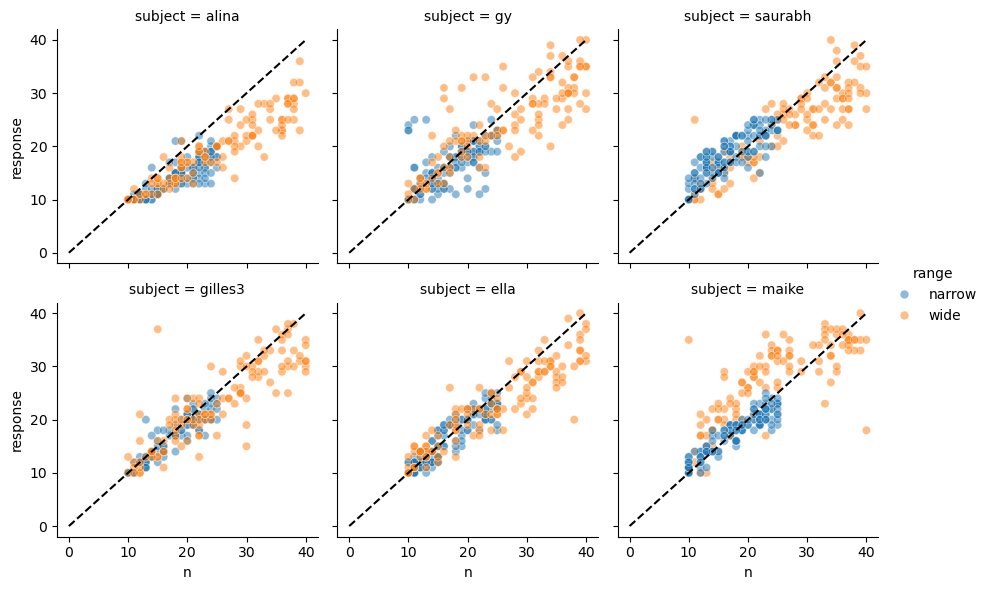

In [26]:
import matplotlib.pyplot as plt

g = sns.relplot(x='n', y='response', data=df.xs('estimation_task', 0, 'task').reset_index(), col='subject', hue='range', hue_order=['narrow', 'wide'], col_wrap=3, height=3., alpha=.5)

for ax in g.axes.ravel():
    ax.plot([0, 40], [0, 40], c='k', ls='--')

Text(0.5, 1.05, 'Bias')

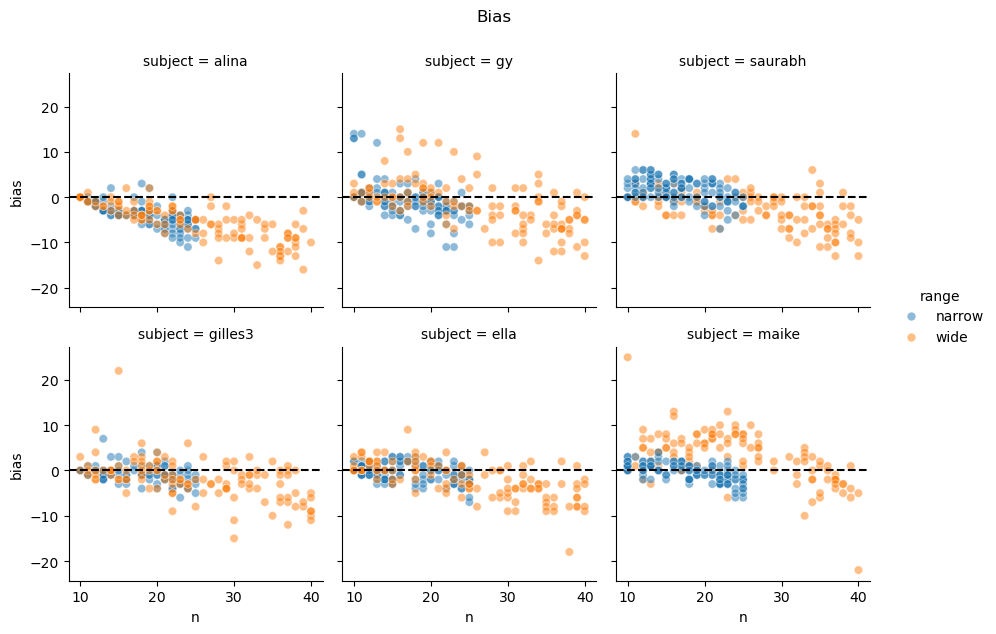

In [25]:
import matplotlib.pyplot as plt

df['bias'] = df['response'] - df['n']

g = sns.relplot(x='n', y='bias', data=df.xs('estimation_task', 0, 'task').reset_index(), col='subject', hue='range', hue_order=['narrow', 'wide'], col_wrap=3, height=3., alpha=.5)
g.map(plt.axhline, y=0, ls='--', c='k')
g.fig.suptitle('Bias', y=1.05)

Text(0.5, 0.98, 'Average bias (rolling mean, window=5)')

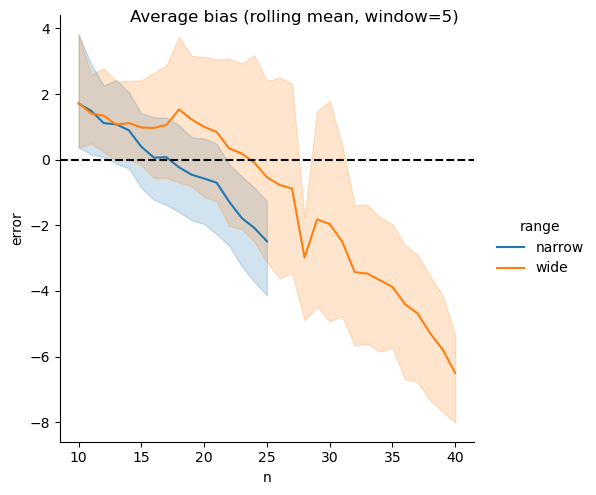

In [15]:
tmp = df.xs('estimation_task', 0, 'task').groupby(['subject', 'range', 'n'])['error'].mean().groupby(['subject', 'range']).apply(lambda d: d.rolling(5, min_periods=1).mean().droplevel([0,1]))

g = sns.relplot(x='n', y='error', hue='range', data=tmp.reset_index(), kind='line')

g.map(plt.axhline, y=0, ls='--', c='k')

g.fig.suptitle('Average bias (rolling mean, window=5)')

Text(0.5, 0.98, 'Average Absolute Error (rolling mean, window=5)')

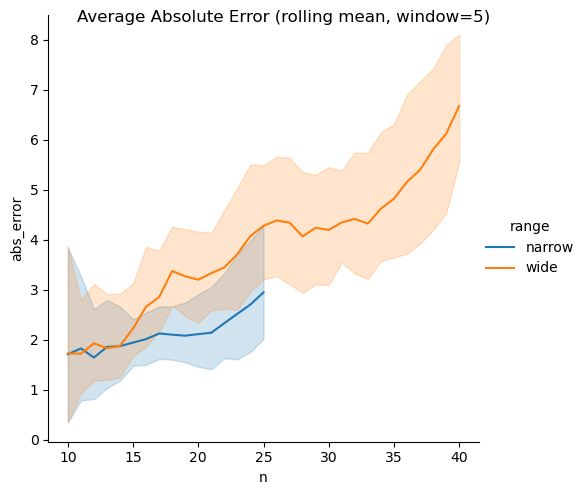

In [16]:
tmp = df.xs('estimation_task', level='task').groupby(['subject', 'range', 'n'])['abs_error'].mean().groupby(['subject', 'range']).apply(lambda d: d.rolling(5, min_periods=1).mean().droplevel([0,1]))

g = sns.relplot(x='n', y='abs_error', hue='range', data=tmp.reset_index(), kind='line')
g.fig.suptitle('Average Absolute Error (rolling mean, window=5)')


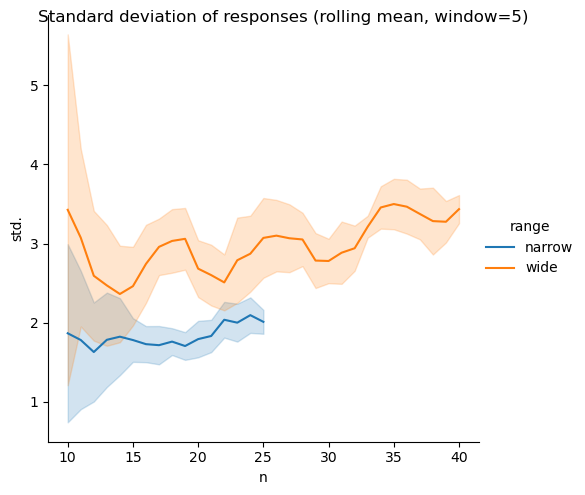

In [20]:
rolling_window = 5
df_std = df.xs('estimation_task', 0, 'task').groupby(['subject', 'range', 'n'], as_index=True)['response'].std().groupby(['subject', 'range']).apply(lambda d: d.rolling(rolling_window, min_periods=1).mean().droplevel([0, 1]))
# .apply(lambda d: d['bias'].rolling(rolling_window).mean()).to_frame().droplevel([2, 3])


g = sns.relplot(x='n', y='response', hue='range', data=df_std.reset_index(), kind='line', errorbar='se')

# g.set_titles('Standard deviation of responses')
g.fig.suptitle('Standard deviation of responses (rolling mean, window=5)')
g.set_ylabels('std.')

In [179]:
no_response_penalty = 0.1
max_reward = 0.14
reward_slope = 1./290.

In [180]:
def get_score(d, include_no_response_penalty=True):

    squared_error = d['error']**2
    reward = max_reward - reward_slope * squared_error

    reward = reward.sum()

    if include_no_response_penalty:
        reward -= no_response_penalty * d.response.isnull().sum()

    return reward

In [181]:
df.groupby(['subject', 'task', 'range']).apply(get_score, include_no_response_penalty=True)

subject  task             range 
alina    estimation_task  narrow     6.834483
                          wide      -2.877931
         feedback         narrow     3.244828
                          wide       2.127586
ella     estimation_task  narrow    14.787586
                          wide       8.768966
         feedback         narrow     3.293103
                          wide       2.879310
gilles3  estimation_task  narrow    10.469655
                          wide       6.376552
         feedback         narrow     3.679310
                          wide       2.206897
gy       estimation_task  narrow     8.207586
                          wide       3.166207
         feedback         narrow     3.534483
maike    estimation_task  narrow    14.164138
                          wide      -0.220690
         feedback         narrow     3.882759
                          wide       2.544828
saurabh  estimation_task  narrow    13.255172
                          wide       5.542759
 

In [182]:
df.groupby(['subject']).apply(get_score, include_no_response_penalty=True)

subject
alina       9.328966
ella       29.728966
gilles3    22.732414
gy         14.908276
maike      20.371034
saurabh    23.311724
dtype: float64

In [160]:
df['bias'] = df['response'] - df['n']

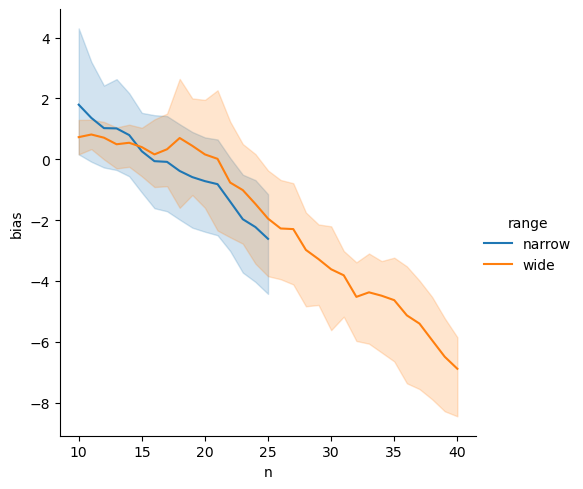

In [161]:
rolling_window = 5
bias = df.xs('estimation_task', 0, 'task').groupby(['subject', 'range', 'n'], as_index=True)['bias'].mean().groupby(['subject', 'range']).apply(lambda d: d.rolling(5, min_periods=1).mean().droplevel([0, 1]))
# .apply(lambda d: d['bias'].rolling(rolling_window).mean()).to_frame().droplevel([2, 3])


sns.relplot(x='n', y='bias', hue='range', data=bias.reset_index(), kind='line')

In [61]:
df.xs('estimation_task', 0, 'task').groupby(['subject', 'range', 'n'], as_index=True)['response'].std().isnull().any()

True

Text(0.5, 0.98, 'Standard deviation of responses')

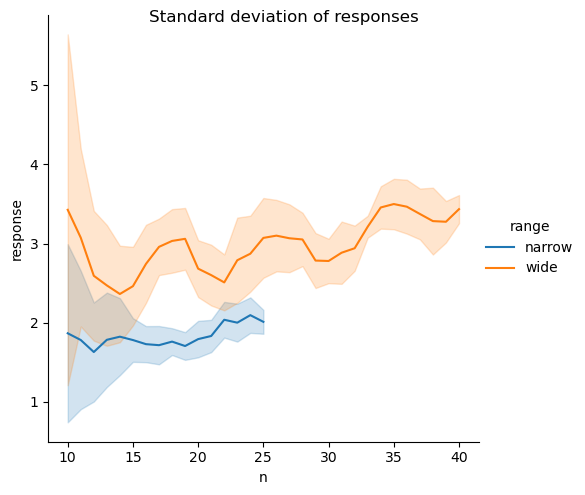

In [188]:
rolling_window = 5
df_std = df.xs('estimation_task', 0, 'task').groupby(['subject', 'range', 'n'], as_index=True)['response'].std().groupby(['subject', 'range']).apply(lambda d: d.rolling(rolling_window, min_periods=1).mean().droplevel([0, 1]))
# .apply(lambda d: d['bias'].rolling(rolling_window).mean()).to_frame().droplevel([2, 3])


g = sns.relplot(x='n', y='response', hue='range', data=df_std.reset_index(), kind='line', errorbar='se')

# g.set_titles('Standard deviation of responses')
g.fig.suptitle('Standard deviation of responses')

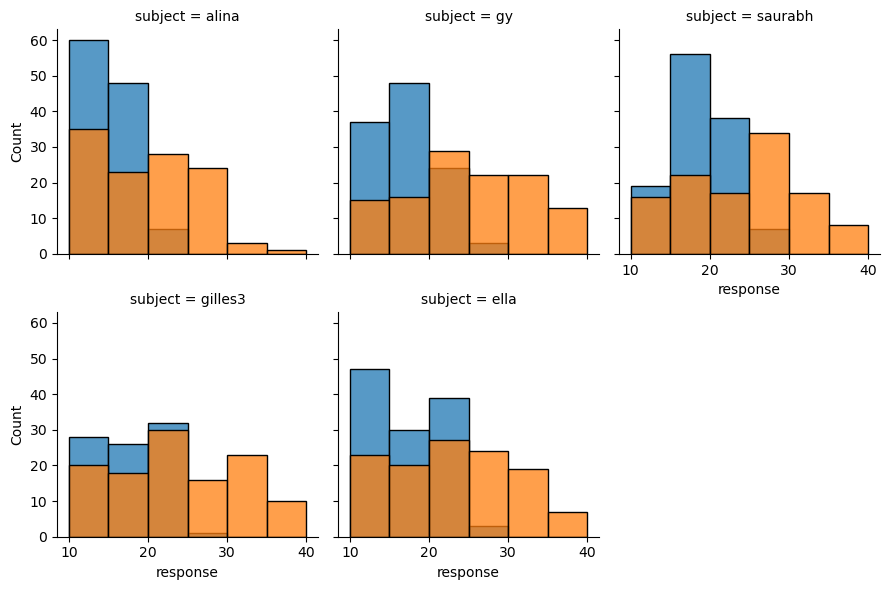

In [172]:
import numpy as np
g = sns.FacetGrid(df.xs('estimation_task', 0, 'task').reset_index(), col='subject', hue='range', hue_order=['narrow', 'wide'], col_wrap=3)

g.map(sns.histplot, 'response', bins=np.arange(10, 41, 5))

In [15]:
pd.factorize(df['range'])

(array([0, 0, 0, ..., 1, 1, 1]), Index(['narrow', 'wide'], dtype='object'))

In [17]:
df['bias'] = df['response'] - df['n']

In [18]:
from patsy import dmatrix
import pymc as pm
import numpy as np
import pytensor as pt

def inverse_softplus_np(x):
    return np.log(np.exp(x) - 1.)

def build_model(data, dof_splines=6):

    sub_ix, subject_mapping = pd.factorize(data.index.get_level_values('subject'))
    range_ix, range_mapping = pd.factorize(data['range'])

    # Different design matrix for low prob and high prob range!
    X = dmatrix(f'bs(n, df={dof_splines}, degree=3, include_intercept=True, lower_bound=15, upper_bound=40) - 1', {'estimate':data['n']})

    coords = {'subject': subject_mapping, 'spline_n': np.arange(dof_splines), 'range':range_mapping}

    model = pm.Model(coords=coords)

    with model:

        beta_bias_mu = pm.Normal('beta_bias_mu', mu=0, sigma=.05, dims=('range', 'spline_n'))
        beta_bias_sd = pm.HalfCauchy('beta_bias_sd', .05, dims=('range', 'spline_n'))
        
        beta_sd_mu = pm.Normal('beta_sd_mu', mu=inverse_softplus_np(.1), sigma=1., dims=('range', 'spline_n'))
        beta_sd_sd = pm.HalfCauchy('beta_sd_sd', .05, dims=('range', 'spline_n'))

        subject_offset_bias = pm.Normal(f'beta_bias_offset', mu=0, sigma=1, dims=('subject', 'range', 'spline_n'))
        subject_offset_sd = pm.Normal(f'beta_d_offset', mu=0, sigma=1, dims=('subject', 'range', 'spline_n'))

        beta_bias = pm.Deterministic('beta_bias', beta_bias_mu + subject_offset_bias * beta_bias_sd, dims=('subject', 'range', 'spline_n'))
        beta_sd = pm.Deterministic('beta_sd', beta_sd_mu + subject_offset_sd * beta_sd_sd, dims=('subject', 'range', 'spline_n'))

        pred_bias = pt.sum(X * beta_bias[sub_ix, range_ix, :], axis=1)
        pred_sd = pt.softplus(pt.sum(X * beta_sd[sub_ix, range_ix, :], axis=1))

        ll = pm.Normal('pred', mu=pred_bias, sigma=pred_sd, observed=data['bias'].values)

    return model

In [22]:
tmp = df.groupby(['subject', 'task', 'range'], as_index=True).apply(lambda d: d.sort_values('n').set_index('n', append=True)['response'].rolling(5).mean()).to_frame('estimate')


tmp


estimate
subject task            range  subject task            run     n             
saurabh estimation_task narrow saurabh estimation_task 5   115 10.0       NaN
                                                           108 10.0       NaN
                                                           185 10.0       NaN
                                                           143 10.0       NaN
                                                           24  10.0      11.0
...                                                                       ...
        feedback        wide   saurabh feedback        1   118 37.0      34.0
                                                           48  37.0      33.4
                                                           103 37.0      34.2
                                                           8   37.0      34.6
                                                           63  39.0      33.0

[120 rows x 1 columns]

In [21]:
sns.relplot(x='n', y='estimate', data=tmp.reset_index(), kind='line', hue='range', col='task', col_wrap=2)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_66037/2577435697.py", line 1, in <module>
    sns.relplot(x='n', y='estimate', data=tmp.reset_index(), kind='line', hue='range', col='task', col_wrap=2)
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/frame.py", line 6220, in reset_index
    new_obj.insert(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/frame.py", line 4931, in insert
    raise ValueError(f"cannot insert {column}, already exists")
ValueError: cannot insert task, already exists

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2057, in showtra

In [ ]:
df['error']

In [3]:
!ls /data/ds-neuralpriors/sourcedata/behavior/sub-alina/ses-1/sub-alina_ses-1_task-

ls: /data/ds-neuralpriors/sourcedata/behavior/sub-alina/ses-1/sub-alina_ses-1_task-estimation_run-1_events.tsv: No such file or directory


In [ ]:
import pandas as pd
import os.path as op
import glob
import re


log_dir = op.abspath(op.join('../experiment/logs'))


log_dir = '/Users/gdehol/Dropbox/Science/neural_priors/data/logs'

In [ ]:
no_response_penalty = 0.1
max_reward = 0.1
reward_slope = 0.005

In [ ]:
subject, session = 'alina', 1

feedback_log_files = glob.glob(op.join(log_dir, f'sub-{subject}', f'ses-{session}', '*task-feedback_run-*_events.tsv'))
estimation_log_files = glob.glob(op.join(log_dir, f'sub-{subject}', f'ses-{session}', '*task-estimation_task_run-*_events.tsv'))
print(op.join(log_dir, f'sub-{subject}', f'ses-{session}', '*task-feedback_run-*_events.tsv'))

reg = re.compile('.*/sub-(?P<subject>.+)_ses-(?P<session>[0-9]+)_task-(?P<task>[a-zA-Z_]+)_run-(?P<run>[0-9]+)_events.tsv')

stats = {}

feedback_df = []
for fn in feedback_log_files:
    run = reg.match(fn).group('run')
    d = pd.read_csv(fn, sep='\t')
    d['run'] = run
    feedback_df.append(d)

feedback_df = pd.concat(feedback_df).set_index(['run', 'trial_nr', 'event_type']).xs('feedback', level='event_type').astype({'n':float, 'response':float})
feedback_error = feedback_df['n'] - feedback_df['response']

stats['mean_error_feedback'] = feedback_error.mean()
stats['mean_abs_error_feedback'] = feedback_error.abs().mean()
stats['mean_squared_error_feedback'] = feedback_error.pow(2).mean()
stats['n_no_responses_feedback'] = feedback_error.isnull().sum()
stats['total_reward_feedback'] = stats['n_no_responses_feedback'] *  no_response_penalty
feedback_error = feedback_error[~feedback_error.isnull()]
stats['total_reward_feedback'] += (max_reward - feedback_error.pow(2) * reward_slope).sum()
stats['total_n_feedback_trials'] = len(feedback_error)

estimation_df = []

for fn in estimation_log_files:
    run = reg.match(fn).group('run')
    d = pd.read_csv(fn, sep='\t')
    d['run'] = run
    estimation_df.append(d)

estimation_df = pd.concat(estimation_df).set_index(['run', 'trial_nr', 'event_type']).xs('feedback', level='event_type').astype({'n':float, 'response':float})
estimation_error = estimation_df['response'] - estimation_df['n']

stats['mean_error_estimation'] = estimation_error.mean()
stats['mean_abs_error_estimation'] = estimation_error.abs().mean()
stats['mean_squared_error_estimation'] = estimation_error.pow(2).mean()
stats['n_no_responses_estimation'] = estimation_error.isnull().sum()
stats['total_reward_estimation'] = stats['n_no_responses_estimation'] *  no_response_penalty
estimation_error = estimation_error[~estimation_error.isnull()]
stats['total_reward_estimation'] += (max_reward - estimation_error.pow(2) * reward_slope).sum()
stats['total_n_estimation_trials'] = len(estimation_error)

/Users/gdehol/Dropbox/Science/neural_priors/data/logs/sub-alina/ses-1/*task-feedback_run-*_events.tsv


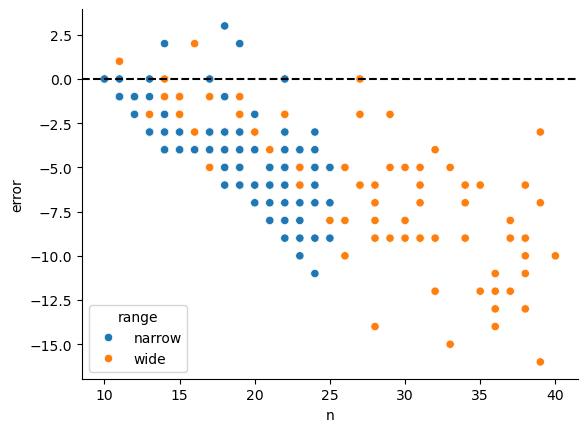

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
estimation_df['error'] = estimation_error

estimation_df['range'] = estimation_df.index.get_level_values('run').astype(int).map(lambda run: 'narrow' if run < 5 else 'wide')
sns.scatterplot(x='n', y='error', hue='range', data=estimation_df)
plt.axhline(0.0, c='k', ls='--')

sns.despine()

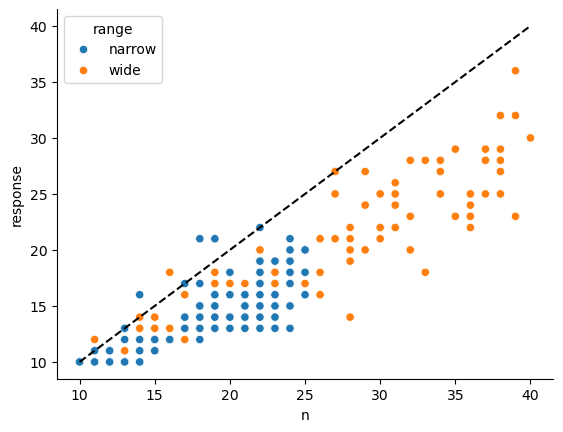

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='n', y='response', hue='range', data=estimation_df)
# plt.axhline(0.0, c='k', ls='--')
plt.plot([10, 40], [10, 40], '--k')

sns.despine()

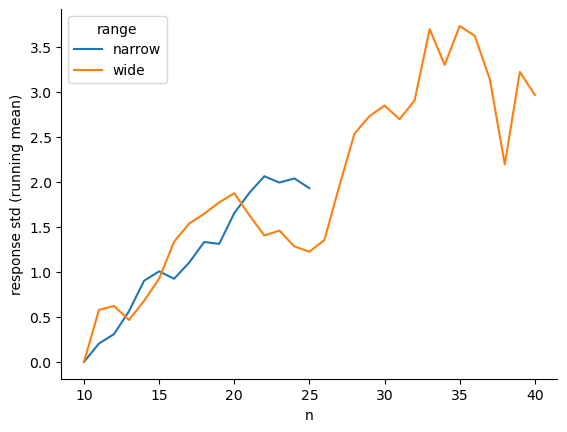

In [ ]:
tmp = estimation_df[estimation_df.error < (estimation_df.error.mean() + estimation_df.error.std()*3.5)].groupby(['range', 'n'])['response'].std().to_frame('response std')

tmp['response std (running mean)'] = tmp.groupby('range')['response std'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)

tmp.reset_index(inplace=True)
sns.lineplot(x='n', y='response std (running mean)', hue='range', data=tmp)

sns.despine()

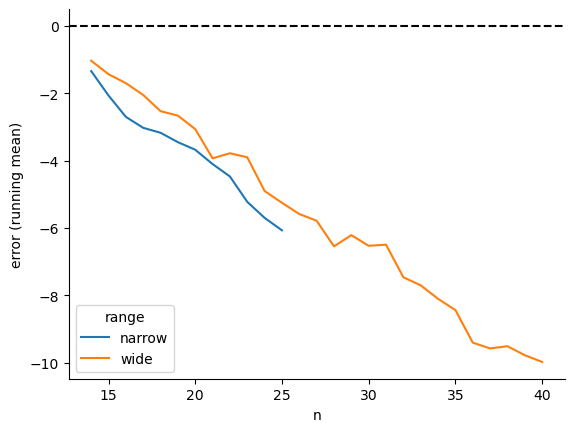

In [ ]:
error = estimation_df[estimation_df.error < (estimation_df.error.mean() + estimation_df.error.std()*3.5)].groupby(['n', 'range']).mean()

error = error.sort_values('n')

error['error (running mean)'] = error.groupby('range')['error'].rolling(window=5).mean().reset_index(level=0, drop=True)

sns.lineplot(x='n', y='error (running mean)', hue='range', data=error.reset_index())

plt.axhline(0.0, c='k', ls='--')
sns.despine()
# error

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_64460/583073112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error['absolute error'] = error['error'].abs()


<Axes: xlabel='n', ylabel='absolute error (running mean)'>

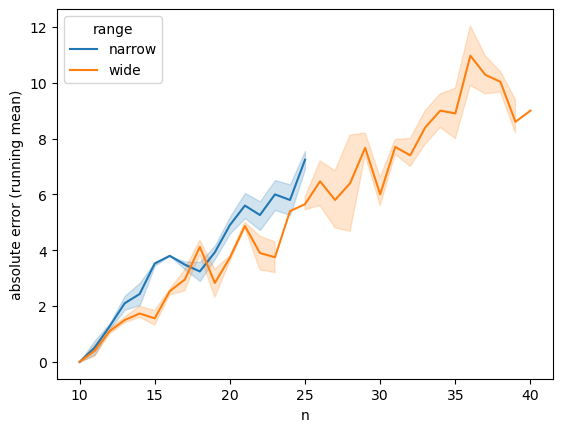

In [ ]:
error = estimation_df[estimation_df.error < (estimation_df.error.mean() + estimation_df.error.std()*3.5)]

error['absolute error'] = error['error'].abs()

error = error.sort_values('n')

error['absolute error (running mean)'] = error.groupby('range')['absolute error'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)

sns.lineplot(x='n', y='absolute error (running mean)', hue='range', data=error.reset_index())
# error

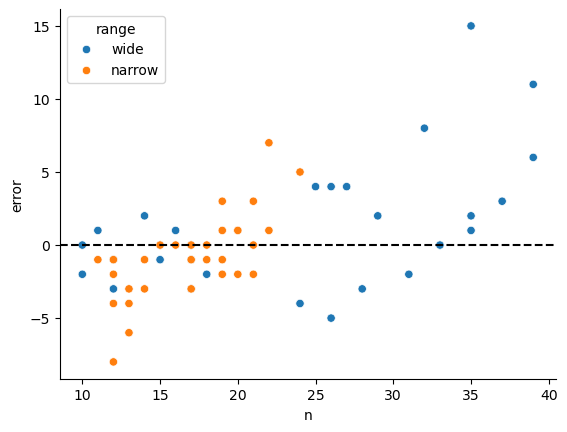

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
feedback_df['error'] = feedback_error

feedback_df['range'] = feedback_df.index.get_level_values('run').astype(int).map(lambda run: 'narrow' if run < 5 else 'wide')
sns.scatterplot(x='n', y='error', hue='range', data=feedback_df)
plt.axhline(0.0, c='k', ls='--')

sns.despine()

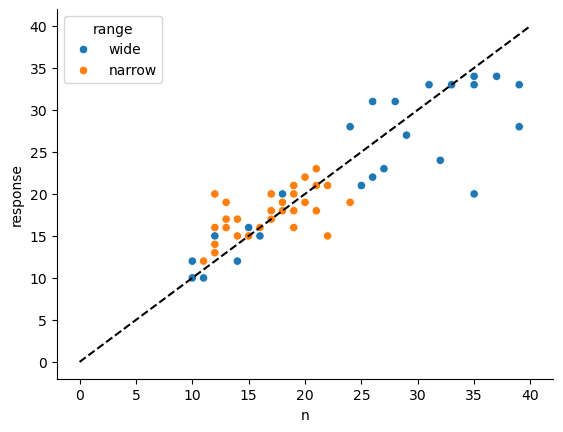

In [ ]:
sns.scatterplot(x='n', y='response', hue='range', data=feedback_df)
# plt.axhline(0.0, c='k', ls='--')
plt.plot([0, 40], [0, 40], '--k')

sns.despine()